In [138]:
import numpy as np
import matplotlib.pyplot as plt

In [139]:
import os
import shutil
import time

In [140]:
dir_save = "../.saves/" + "two kinks shape changing C T = 10 Cave = 0/" 

# Plot space average of u(t) for all experiments in the folder

In [141]:
N = 10000000
dt = 0.008
tmax = 5000
imax = int(tmax/dt)

Text(0.5, 1.0, 'Crank-Nicolson vary T,dt Cave=0 u0=1 $T/dt = 10$')

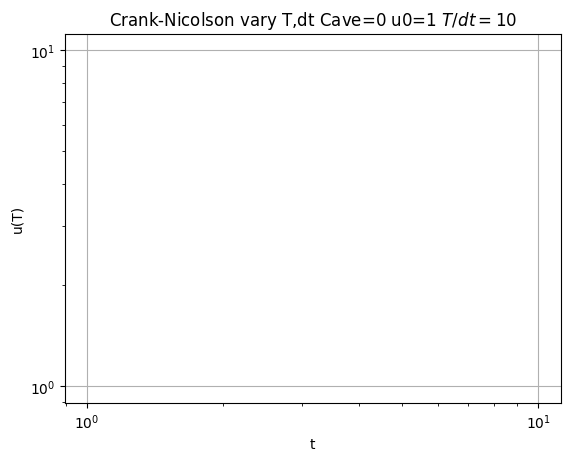

In [142]:
# Create plot object
fig, ax = plt.subplots()
ax.set_xscale("log")
ax.set_xlabel("t")
ax.set_ylabel("u(T)")
ax.set_yscale("log")
ax.grid()
ax.set_title("Crank-Nicolson vary T,dt Cave=0 u0=1 $T/dt = 10$")

../.saves/two kinks shape changing C T = 10 Cave = 0/1709044105121
../.saves/two kinks shape changing C T = 10 Cave = 0/1709044086068
../.saves/two kinks shape changing C T = 10 Cave = 0/1709044066376
../.saves/two kinks shape changing C T = 10 Cave = 0/1709043954769
../.saves/two kinks shape changing C T = 10 Cave = 0/1709043949513
../.saves/two kinks shape changing C T = 10 Cave = 0/1709043944832
../.saves/two kinks shape changing C T = 10 Cave = 0/1709043930136
../.saves/two kinks shape changing C T = 10 Cave = 0/1709043915682
../.saves/two kinks shape changing C T = 10 Cave = 0/1709043914351
../.saves/two kinks shape changing C T = 10 Cave = 0/1709043912918
../.saves/two kinks shape changing C T = 10 Cave = 0/1709043911428
../.saves/two kinks shape changing C T = 10 Cave = 0/1709043909762
../.saves/two kinks shape changing C T = 10 Cave = 0/1709043898658
../.saves/two kinks shape changing C T = 10 Cave = 0/1709043894761
../.saves/two kinks shape changing C T = 10 Cave = 0/170904389

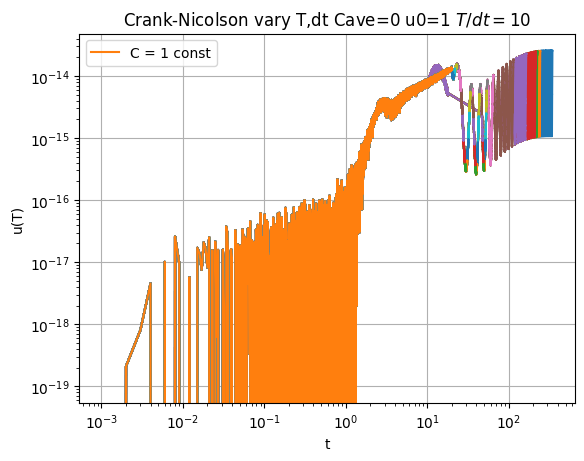

In [143]:
# Get all the simulations in the selected folder
for folder in sorted(os.listdir(dir_save), reverse=True):
    dir = dir_save + folder
    print(dir)
    # Get label of the curve
    f = open(dir + "/label.dat", "r")
    label = f.readline().strip('\n')
    f.close()

    f = open(dir + "/fileAveout.dat", "r")
    x = np.zeros(N)
    y = np.zeros(N)
    i = 0
    for row in f:
        a, b = row.split(" ")
        x[i] = float(a)
        y[i] = float(b)
        i = i + 1
        if i > imax:
            break
    ax.plot(x[0:min(i,imax)], y[0:min(i,imax)],label=label)
ax.legend()
fig

# Plot the final state u(x,tmax) for any experiment in the folder

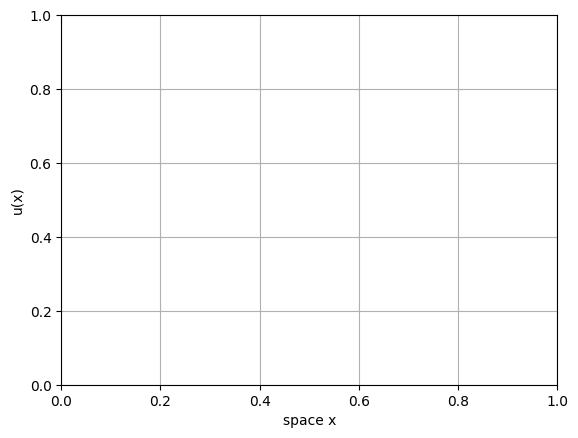

In [144]:
# Create plot object
fig, ax = plt.subplots()
ax.set_xscale("linear")
ax.set_xlabel("space x")
ax.set_ylabel("u(x)")
ax.set_yscale("linear")
ax.grid()

../.saves/two kinks shape changing C T = 10 Cave = 0/1709037221477
-0.500000
C = 1.0
300 700
../.saves/two kinks shape changing C T = 10 Cave = 0/1709037249906
5.000000
C = 0.5877852522924727
300 700
../.saves/two kinks shape changing C T = 10 Cave = 0/1709037251736
5.000000
C = 0.9510565162951529
300 700
../.saves/two kinks shape changing C T = 10 Cave = 0/1709037253369
5.000000
C = 0.9510565162951538
300 700
../.saves/two kinks shape changing C T = 10 Cave = 0/1709037254971
5.000000
C = 0.5877852522924736
300 700
../.saves/two kinks shape changing C T = 10 Cave = 0/1709037322262
5.000000
C = -0.5877852522924726
300 700
../.saves/two kinks shape changing C T = 10 Cave = 0/1709037324361
5.000000
C = -0.9510565162951534
300 700
../.saves/two kinks shape changing C T = 10 Cave = 0/1709037326129
5.000000
C = -0.9510565162951538
300 700
../.saves/two kinks shape changing C T = 10 Cave = 0/1709037328069
5.000000
C = -0.5877852522924737
300 700
../.saves/two kinks shape changing C T = 10 Cav

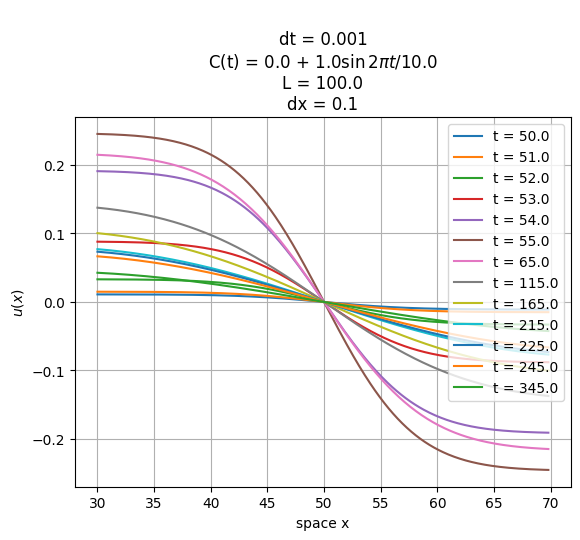

In [145]:
# Get all the simulations in the selected folder
xmin = 30
xmax = 70

for folder in sorted(os.listdir(dir_save), reverse=False):
    dir = dir_save + folder
    print(dir)

    f = open(dir + "/tdgl_result.dat", "r")
    N = 1000000000
    x = np.zeros(N)
    y = np.zeros(N)
    i = 0
    for row in f:
        if i != 0:
            a, b = row.split(" ")
            x[i-1] = float(a)
            y[i-1] = float(b)
        else:
            N, tmax, dx, dt, seed, A, Thalf, Cave = row.split(" ")
            N = int(N)
            tmax = float(tmax)
            dx = float(dx)
            L = N*dx
            dt = float(dt)
            A = float(A)
            print(Thalf)
            T = 2*float(Thalf)
            Cave = float(Cave)
        i = i + 1

    f.close()
    
    # Get label of the curve
    f = open(dir + "/label.dat", "r")
    label = f.readline().strip('\n')
    f.close()
    # Custom label
    labell = label
    # Label with the state's time
    state_time = tmax 
    state_time = round(state_time, 3)
    labell = "t = " + str(state_time) # Label with time (uncomment for custom label)
    
    # Get last value of C (C at the time of the plotted state)
    f = open(dir + "/fileCout.dat", "r")
    for row in f:
        tt, C = row.split(" ") #Only the last row is interesting
    C = float(C)
    print("C = "+str(C))
    if T < 0:
        labell = labell + " (initial)"

    imin = int(xmin/dx)
    imax = int(xmax/dx)
    if xmin < 0:
        imin = 0
    if xmax > L or xmax < 0:
        imax = i
    print(imin, imax)
    if state_time >= 50:
        ax.plot(x[imin:imax-1], y[imin:imax-1], label = labell)
    
#eps = 0.5
#plt.ylim(-1-eps,1+eps)

label = ""
#u0 = 1
#label = label + "$u_0 = " + str(u0) + "$"
label= label + "\ndt = " + str(dt)
if T > 0:
    label = label + "\nC(t) = " + str(Cave) + " + " + str(A) + "$\sin{2\pi t/" + str(T) + "}$"
else:
    label = label + "\nC = " + str(Cave)
label = label + "\nL = " + str(round(N*dx,3))
label = label + "\ndx = " + str(round(dx,3))
#label = "dt = " + str(dt) 
#if float(T) > 0:
#label = label + "; T = " + str(T) + "; A = " + str(A)
#else:
#label = label + "; C = " + str(A) + " cost"

ax.set_title(label)
ax.set_xlabel("space x")
ax.set_ylabel("$u(x)$")



ax.legend()
fig

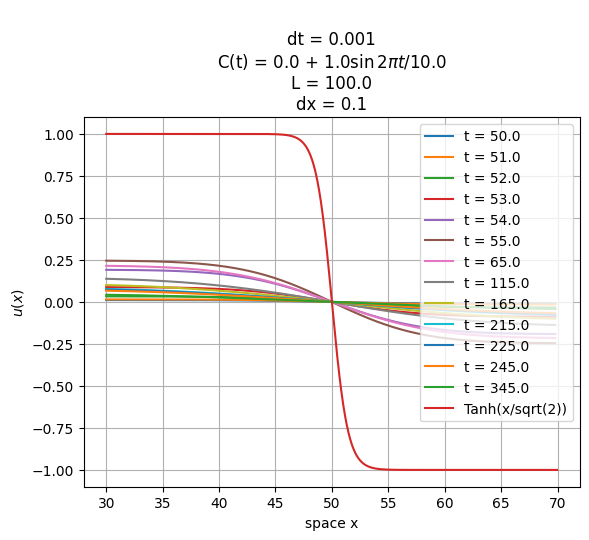

In [146]:
# Plot analytical solution
Num = 1000
x = np.arange(0,Num)/Num*(xmax-xmin)+xmin*np.ones(Num)
y = np.zeros(Num)
j = 0
xc = 50 # tanh center
for xi in x:
    y[j] = -np.tanh((x[j]-xc)/np.sqrt(2))
    j = j + 1
ax.plot(x,y,label="Tanh(x/sqrt(2))")
ax.legend()
fig

In [147]:
x

array([30.  , 30.04, 30.08, 30.12, 30.16, 30.2 , 30.24, 30.28, 30.32,
       30.36, 30.4 , 30.44, 30.48, 30.52, 30.56, 30.6 , 30.64, 30.68,
       30.72, 30.76, 30.8 , 30.84, 30.88, 30.92, 30.96, 31.  , 31.04,
       31.08, 31.12, 31.16, 31.2 , 31.24, 31.28, 31.32, 31.36, 31.4 ,
       31.44, 31.48, 31.52, 31.56, 31.6 , 31.64, 31.68, 31.72, 31.76,
       31.8 , 31.84, 31.88, 31.92, 31.96, 32.  , 32.04, 32.08, 32.12,
       32.16, 32.2 , 32.24, 32.28, 32.32, 32.36, 32.4 , 32.44, 32.48,
       32.52, 32.56, 32.6 , 32.64, 32.68, 32.72, 32.76, 32.8 , 32.84,
       32.88, 32.92, 32.96, 33.  , 33.04, 33.08, 33.12, 33.16, 33.2 ,
       33.24, 33.28, 33.32, 33.36, 33.4 , 33.44, 33.48, 33.52, 33.56,
       33.6 , 33.64, 33.68, 33.72, 33.76, 33.8 , 33.84, 33.88, 33.92,
       33.96, 34.  , 34.04, 34.08, 34.12, 34.16, 34.2 , 34.24, 34.28,
       34.32, 34.36, 34.4 , 34.44, 34.48, 34.52, 34.56, 34.6 , 34.64,
       34.68, 34.72, 34.76, 34.8 , 34.84, 34.88, 34.92, 34.96, 35.  ,
       35.04, 35.08,

In [148]:
np.tanh()

TypeError: tanh() takes from 1 to 2 positional arguments but 0 were given